### 비트코인 가격 예측

https://www.blockchain.com/explorer/charts/market-price

***참고**  
**처음으로 0에 수렴하는 시차 이후에 상관이 크게 줄어드는 지점이 적절한 차분 횟수이다.**  
**하지만 일반적인 기준점이므로 실제와 다를 수는 있기 때문에 여러 차분을 시도하여 결정해야 한다.**

In [5]:
import pandas as pd
import json

with open('./datasets/bitcoin_2010_2024.json') as f:
    json_data = json.load(f)

bitcoin_df = pd.DataFrame(json_data['market-price'])
bitcoin_df

,x,y
0,1230940800000,0.00
1,1231286400000,0.00
2,1231632000000,0.00
3,1231977600000,0.00
4,1232323200000,0.00
...,...,...
1405,1716508800000,67942.23
1406,1716854400000,69374.17
1407,1717200000000,67484.93
1408,1717545600000,70553.24


In [6]:
from datetime import datetime

def changeDate(milis):
    timestamp = milis / 1000
    converted_time = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
    return converted_time

In [8]:
bitcoin_df.x = bitcoin_df.x.apply(changeDate)
bitcoin_df

,x,y
0,2009-01-03,0.00
1,2009-01-07,0.00
2,2009-01-11,0.00
3,2009-01-15,0.00
4,2009-01-19,0.00
...,...,...
1405,2024-05-24,67942.23
1406,2024-05-28,69374.17
1407,2024-06-01,67484.93
1408,2024-06-05,70553.24


In [9]:
bitcoin_df.set_index('x', inplace=True)
bitcoin_df

,y
x,
2009-01-03,0.00
2009-01-07,0.00
2009-01-11,0.00
2009-01-15,0.00
2009-01-19,0.00
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [10]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1410 entries, 2009-01-03 to 2024-06-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1410 non-null   float64
dtypes: float64(1)
memory usage: 22.0+ KB


In [12]:
bitcoin_df.index = pd.to_datetime(bitcoin_df.index)
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1410 entries, 2009-01-03 to 2024-06-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1410 non-null   float64
dtypes: float64(1)
memory usage: 22.0 KB


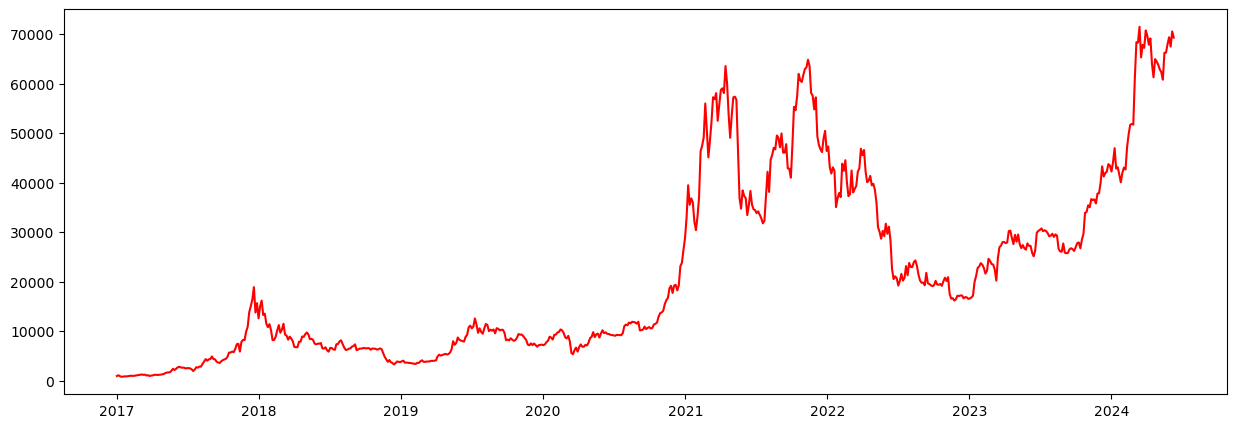

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.plot(bitcoin_df['2017-01-01':], c='red')
plt.show()

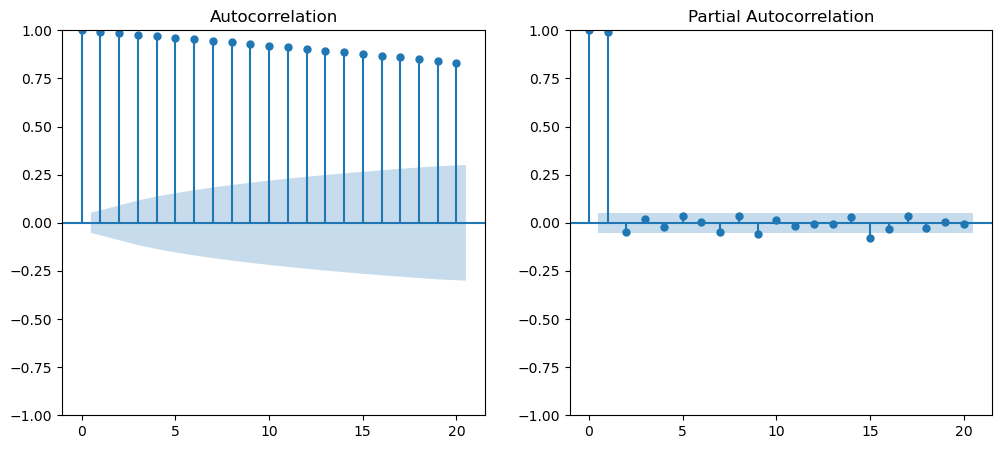

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

fig = plot_acf(bitcoin_df, lags=20, ax=ax[0])
fig = plot_pacf(bitcoin_df, lags=20, ax=ax[1])

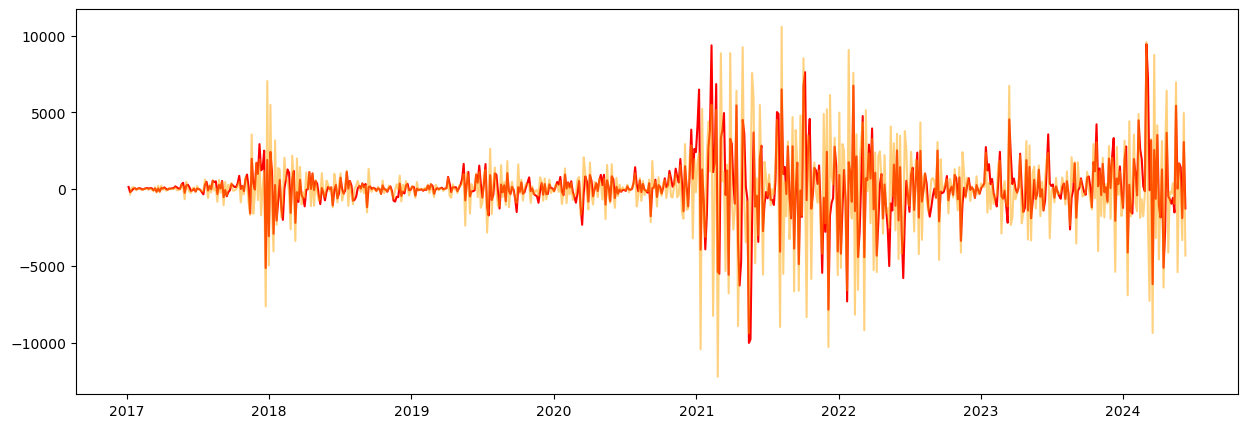

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.plot(bitcoin_df['2017-01-01':].diff().dropna(), c='red')
plt.plot(bitcoin_df['2017-01-01':].diff().diff().dropna(), c='orange', alpha=0.5)
plt.show()

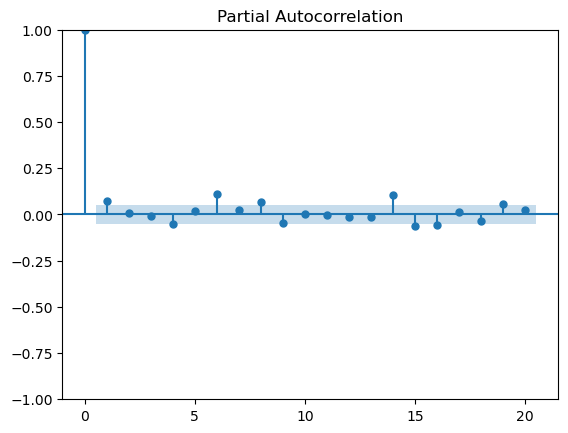

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(bitcoin_df.diff().dropna(), lags=20)
plt.show()

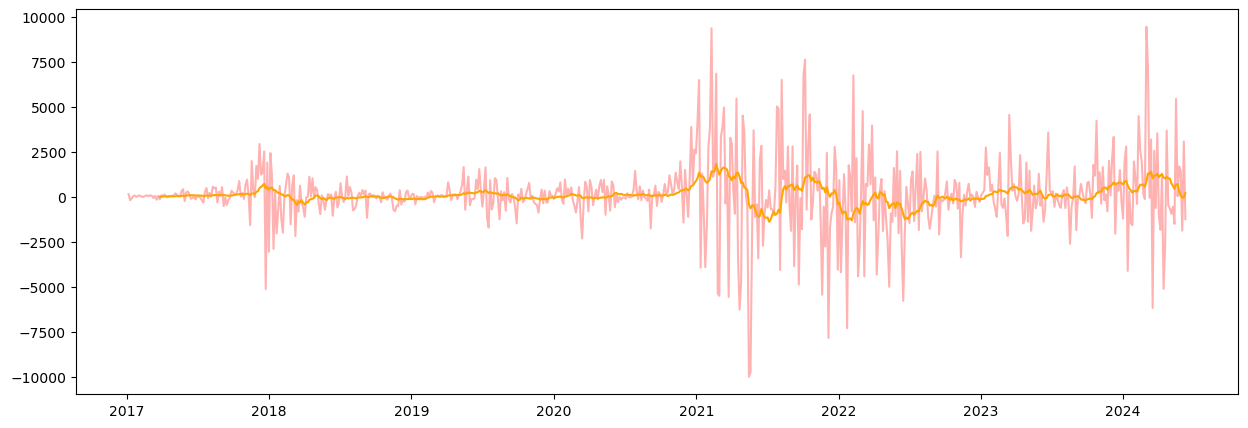

In [55]:
import matplotlib.pyplot as plt

window_size = 21

plt.figure(figsize=(15, 5))

plt.plot(bitcoin_df['2017-01-01':].diff().dropna(), c='red', alpha=0.3)
plt.plot(bitcoin_df['2017-01-01':].diff().dropna().rolling(window_size).mean(), c='orange')
plt.show()

In [56]:
bitcoin_df = bitcoin_df['2017-01-01':]
bitcoin_df

,y
x,
2017-01-01,964.84
2017-01-05,1109.16
2017-01-09,910.49
2017-01-13,805.52
2017-01-17,830.56
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [63]:
bitcoin_df['2023':]

,y
x,
2023-01-02,16613.71
2023-01-06,16826.41
2023-01-10,17192.07
2023-01-14,19933.36
2023-01-18,21145.18
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 4D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


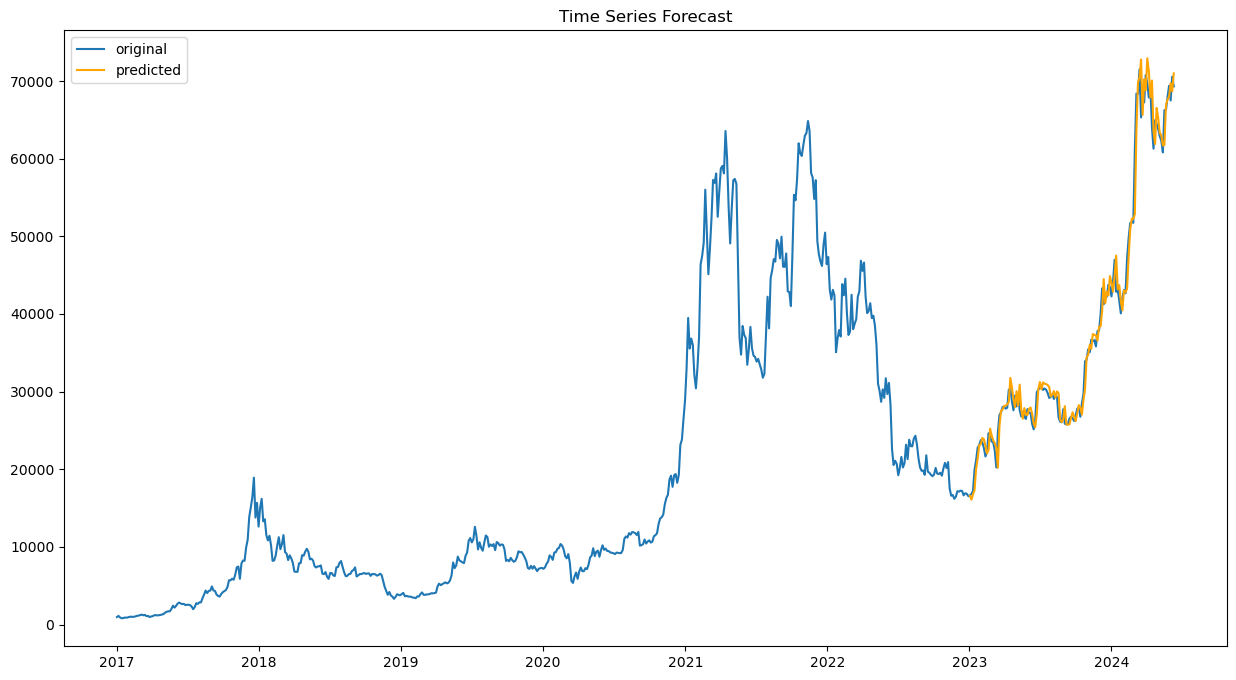

In [70]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(bitcoin_df, order=(1, 4, 21))
model_fit = model.fit()

start_index = pd.to_datetime('2023-01-02')
end_index = pd.to_datetime('2024-06-09')
forecast = model_fit.predict(start=start_index, end=end_index)

plt.figure(figsize=(15, 8))
plt.plot(bitcoin_df, label='original')
plt.plot(forecast, label='predicted', c='orange')
plt.title("Time Series Forecast")
plt.legend()
plt.show()

In [74]:
bitcoin_df.tail()

,y
x,
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93
2024-06-05,70553.24
2024-06-09,69297.93


In [75]:
forecast.tail()

2024-05-24    67604.139465
2024-05-28    67997.655300
2024-06-01    69708.425767
2024-06-05    68673.367972
2024-06-09    70976.346268
Freq: 4D, Name: predicted_mean, dtype: float64

In [76]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# 1, 1, 21
# Mean Squared Error 3675472.7344317045
# Mean Squared Error 0.0024020982419680537

# 4, 1, 21
# Mean Squared Error 3834201.646153027
# Mean Squared Error 0.002482140891774656

# 1, 4, 21
# Mean Squared Error 3940089.8362798565
# Mean Squared Error 0.0025307012448420804

mse = mean_squared_error(bitcoin_df['2023-01-02':'2024-06-09'], forecast)
print("Mean Squared Error", mse)

mse = mean_squared_error(bitcoin_df['2023-01-02':'2024-06-09'], forecast)
print("Root Mean Squared Error", mse ** (1/2))

msle = mean_squared_log_error(bitcoin_df['2023-01-02':'2024-06-09'], forecast)
print("Mean Squared Error", msle)

Mean Squared Error 3940089.8362798565
Root Mean Squared Error 1984.9659534309037
Mean Squared Error 0.0025307012448420804
